In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df=df.drop('Id',axis=1) 


In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

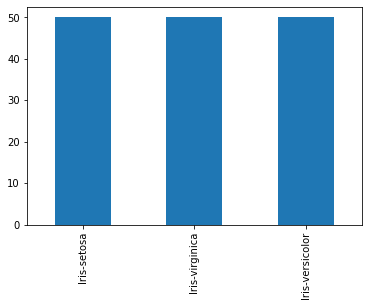

In [10]:
df['Species'].value_counts().plot(kind='bar')

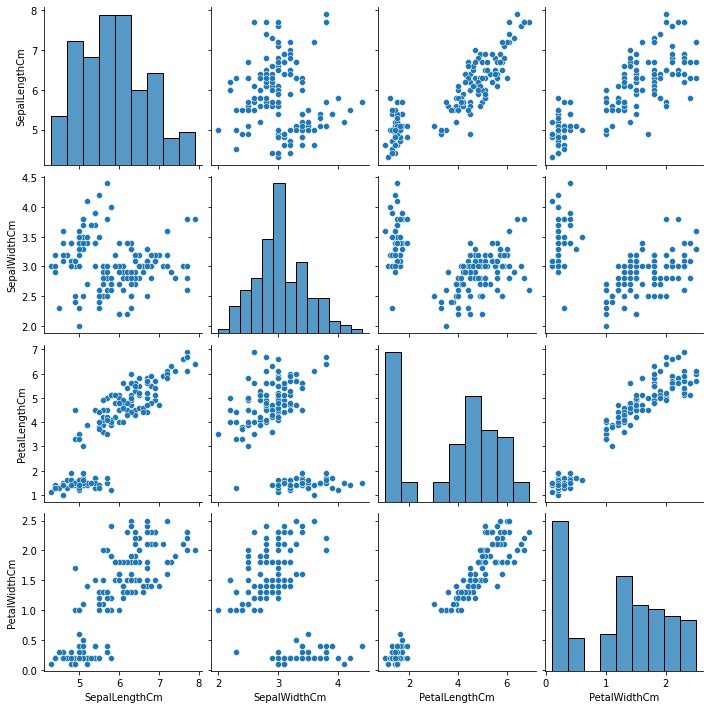

In [11]:
sns.pairplot(df)
plt.show()

Analysis of the above Pairplot:

* First graph from the top row represents the count/frequncy distribution of SepalLengthCm
* Second graph represents weak negative relationship between SepalLengthCm and SepalWidthCm
* Third and fourth graph shows a strong positive relationship of SepalLengthCm with PetalLengthCm and PetalWidthCm

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

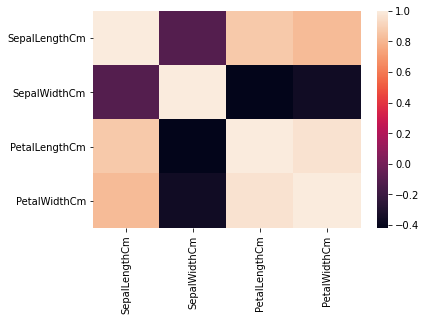

In [13]:
corr = df.corr()

sns.heatmap(corr)

<AxesSubplot:>

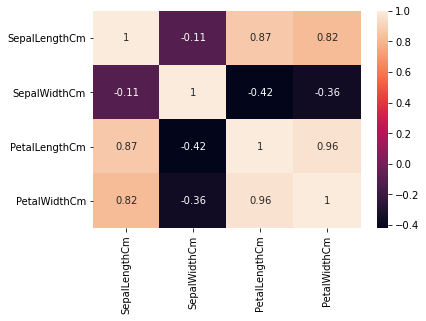

In [14]:
sns.heatmap(corr, annot=True)

<AxesSubplot:>

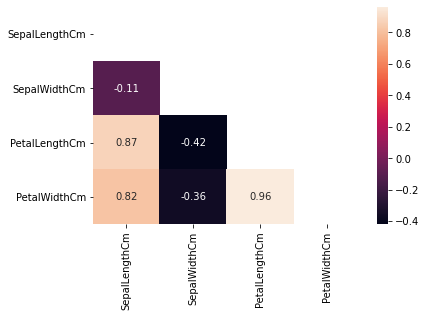

In [15]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot = True, mask=mask)

<AxesSubplot:>

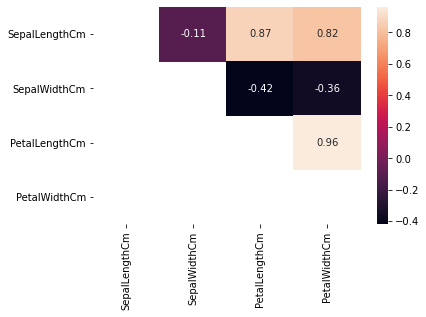

In [16]:
# Generate a mask for the lower triangle.
mask = np.tril(np.ones_like(corr, dtype=bool)) #np.tril is used for Lower triangle of an array.
sns.heatmap(corr, annot = True, mask=mask)

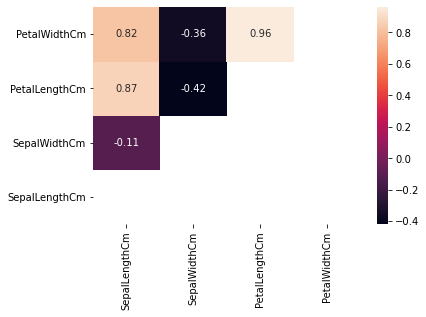

In [17]:
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot = True, mask=mask)
ax.invert_yaxis()

In [18]:
import pandas_profiling as pp
pp.ProfileReport(df)

In [19]:
X = df.drop(['Species'],axis=1)
y = df['Species']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
prediction = model.predict(X_test)

print("The accuracy of the Logistic Regression is",metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.98


In [22]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("The accuracy of SVM is: ",metrics.accuracy_score(prediction,y_test))

The accuracy of SVM is:  0.98


In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("The accuracy of KNN is: ",metrics.accuracy_score(prediction,y_test))

The accuracy of KNN is:  0.98


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("The accuracy of Decision Tree is: ",metrics.accuracy_score(prediction,y_test))

The accuracy of Decision Tree is:  0.96


In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("The accuracy of the random forest is:",metrics.accuracy_score(prediction,y_test))

The accuracy of the random forest is: 0.96


In [28]:
petal = df[['PetalLengthCm','PetalWidthCm','Species']]
sepal = df[['SepalLengthCm','SepalWidthCm','Species']]

In [30]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

In [31]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [33]:
model = svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print("The accuracy of the svm using petal is:",metrics.accuracy_score(prediction,test_y_p))

model = svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print("The accuracy of the Sepal using is: ",metrics.accuracy_score(prediction,test_y_s))


The accuracy of the svm using petal is: 0.9777777777777777
The accuracy of the Sepal using is:  0.8


In [34]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [35]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [36]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


Observations:

Using Petals over Sepal for training the data gives a much better accuracy. This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

In [37]:
# Importing pycaret classification method

from pycaret.classification import *
# This is the first step of model selection
# Here the data is our datasets, target is the labeled 
# column(dependent variable), section is random number for future identification.
exp = setup(data = df, target = 'Species', session_id=77 )

# After this we will get a list of our columns and its type, just confirm they are the same. Then hit enter.

,Description,Value
0,session_id,77
1,Target,Species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
# Importing dataset
from pycaret.datasets import get_data
diabetes = get_data('iris')

# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Species')

# return best model
best = compare_models()

# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

# compare specific models
# best_specific = compare_models(whitelist = ['dt','rf','xgboost'])

# blacklist certain models
# best_specific = compare_models(blacklist = ['catboost', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9609,0.9969,0.9556,0.9687,0.9592,0.9399,0.9451,0.0240
lda,Linear Discriminant Analysis,0.9709,0.9969,0.9667,0.9767,0.9696,0.9553,0.9592,0.0270
lr,Logistic Regression,0.9427,0.9958,0.9389,0.9531,0.9396,0.9125,0.9191,0.0440
knn,K Neighbors Classifier,0.9336,0.9954,0.9250,0.9498,0.9292,0.8981,0.9086,0.0810
rf,Random Forest Classifier,0.9336,0.9945,0.9278,0.9458,0.9301,0.8986,0.9063,0.4010
et,Extra Trees Classifier,0.9236,0.9938,0.9167,0.9378,0.9196,0.8832,0.8923,0.3550
nb,Naive Bayes,0.9527,0.9920,0.9500,0.9611,0.9500,0.9279,0.9331,0.0280
lightgbm,Light Gradient Boosting Machine,0.9245,0.9883,0.9139,0.9425,0.9197,0.8842,0.8958,0.0440
ada,Ada Boost Classifier,0.9436,0.9853,0.9389,0.9538,0.9405,0.9140,0.9203,0.1100
gbc,Gradient Boosting Classifier,0.9245,0.9730,0.9194,0.9297,0.9225,0.8850,0.8894,0.2250
